<a href="https://colab.research.google.com/github/ZlataGlazunova/homeworks/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82%202%20%D0%BC%D0%BE%D0%B4%D1%83%D0%BB%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


**Часть 1**

1.   **2** спальни в самом дешёвом доме
2.   в **15** домах количество спален не больше количества ванных
1.   **2450000** стоит самый дешёвый дом с гостевой комнатой
2.   **0.18181818181818182** часть домов с ценной от 2.000.000 до 5.000.000
может похвастаться кондиционированием воздуха



In [31]:
min_price = df['price'].min()
df_grop = df.groupby('price')['bedrooms'].min()
df_grop[min_price]

2

In [37]:
df_query = df.query('bedrooms <= bathrooms')
len(df_query)

15

In [39]:
df_guestroom = df.query('guestroom == "yes"')
df_guestroom['price'].min()

2450000

In [45]:
df_houses = df.query('(2000000 < price < 5000000)')
df_houses_with = df_houses.query('airconditioning == "yes"')
len(df_houses_with)/len(df_houses)

0.18181818181818182

**Часть 2**

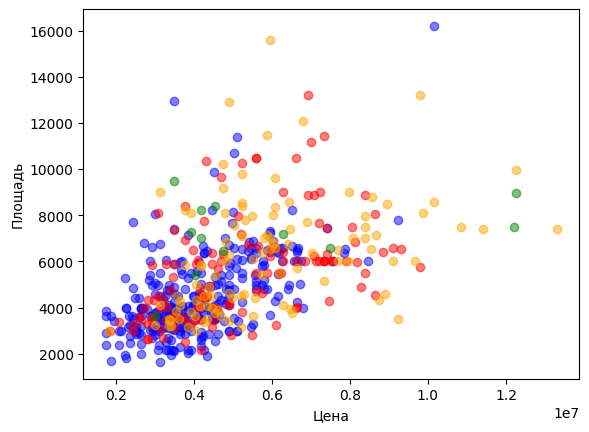

In [67]:
df['parking'].unique()
colors = ['blue', 'red', 'orange', 'green']
for i in range (4):
  for j in range(len(df)):
    if i == df.at[j, 'parking']:
      plt.scatter(df.at[j, 'price'], df.at[j, 'area'], c=colors[i], alpha=0.5)
plt.xlabel('Цена')
plt.ylabel('Площадь')
plt.show()

**Часть3**

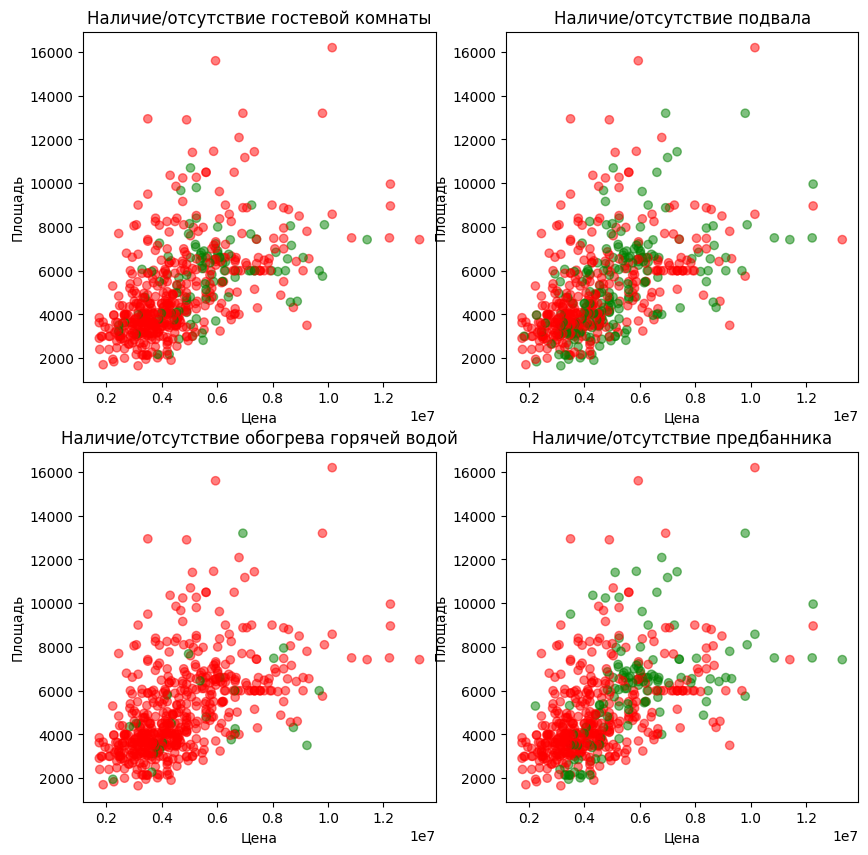

In [89]:
fig, axes = plt.subplots(2,2, figsize=(10,10))
colors = {'yes':'green', 'no': 'red'}
axes[0,0].scatter(df['price'], df['area'], color = df['guestroom'].map(colors), alpha=0.5)
axes[0,0].set_title('Наличие/отсутствие гостевой комнаты')
axes[0,0].set_xlabel('Цена')
axes[0,0].set_ylabel('Площадь')

axes[0,1].scatter(df['price'], df['area'], color = df['basement'].map(colors), alpha=0.5)
axes[0,1].set_title('Наличие/отсутствие подвала')
axes[0,1].set_xlabel('Цена')
axes[0,1].set_ylabel('Площадь')

axes[1,0].scatter(df['price'], df['area'], color = df['hotwaterheating'].map(colors), alpha=0.5)
axes[1,0].set_title('Наличие/отсутствие обогрева горячей водой')
axes[1,0].set_xlabel('Цена')
axes[1,0].set_ylabel('Площадь')

axes[1,1].scatter(df['price'], df['area'], color = df['prefarea'].map(colors), alpha=0.5)
axes[1,1].set_title('Наличие/отсутствие предбанника')
axes[1,1].set_xlabel('Цена')
axes[1,1].set_ylabel('Площадь')
plt.show()